In [20]:
import numpy as np
import pandas as pd
from neural_network import DeepNeuralNetwork, one_hot

train = pd.read_csv('data/fashion-mnist_train.csv')
test = pd.read_csv('data/fashion-mnist_test.csv')

train = np.array(train)
np.random.shuffle(train)

print(train)
print(train.shape)

[[ 8  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 7  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  0  0]
 [ 4  0  0 ... 64  0  0]]
(60000, 785)


In [21]:
#Separating training set into X(Pixels) and Y(Labels/answers)
X_train = train[:, 1:]
Y_train = train[:, 0]

#Transposing and normalizing for dot product in forward propagation
X_train = (X_train / 255).T
Y_train = one_hot(Y_train,10)

print(X_train.shape)
print(Y_train.shape)

(784, 60000)
(10, 60000)


In [22]:
#Defining the layers, 784 inputs (for 784 pixels), 128 simple features, 64 complex, 10 output categories
layer_dims = [784, 128, 64, 10]

model = DeepNeuralNetwork(layer_dims)

learning_rate = 0.1
epochs = 2000
costs = []

for i in range(epochs):
    AL, caches = model.forward_propagation(X_train)

    cost = model.compute_cost(AL, Y_train)
    costs.append(cost)
    
    if i % 100 == 0:
        print(f"Cost after iteration {i}: {cost}")

    grads = model.backward_propagation(AL, Y_train, caches)

    model.update_parameters(grads, learning_rate)


Cost after iteration 0: 2.498778626793949
Cost after iteration 100: 0.627692363881879
Cost after iteration 200: 0.5360545218727063
Cost after iteration 300: 0.5419028695669753
Cost after iteration 400: 0.47307242315163217
Cost after iteration 500: 0.4435118684311894
Cost after iteration 600: 0.4183051796185933
Cost after iteration 700: 0.4018362347266607
Cost after iteration 800: 0.39058718080996346
Cost after iteration 900: 0.3802276271481585
Cost after iteration 1000: 0.36867976923556384
Cost after iteration 1100: 0.3622712260453426
Cost after iteration 1200: 0.3543772687865274
Cost after iteration 1300: 0.35010133052723286
Cost after iteration 1400: 0.3519527278319834
Cost after iteration 1500: 0.33625430656003885
Cost after iteration 1600: 0.33277499112838205
Cost after iteration 1700: 0.33359220977278076
Cost after iteration 1800: 0.3197388325511248
Cost after iteration 1900: 0.3203497127025717


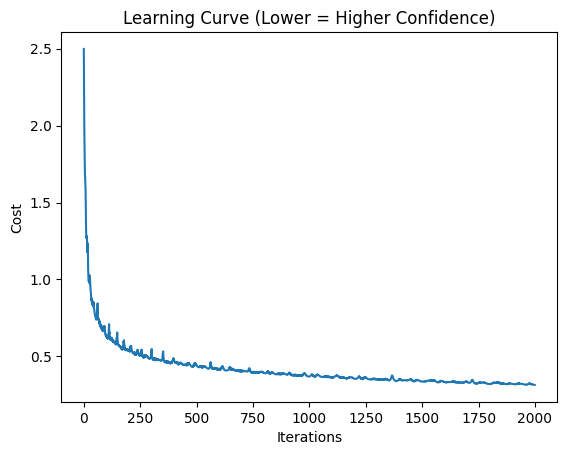

In [25]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Learning Curve (Lower = Higher Confidence)')
plt.show()

In [26]:
#Separating test set into X(Pixels) and Y(Labels/answers)
test = np.array(test)
X_test = test[:, 1:]
Y_test = test[:, 0]

#Transposing and normalizing for dot product in forward propagation
X_test = (X_test / 255).T

print(X_test.shape)
print(Y_test.shape)

(784, 10000)
(10000,)


In [30]:
"""Note, I added "predict" function in deep neural network after I had already 
created the model object, so model cannot fetch predict unless I rerun the training again, 
so I just copy and pasted the function in here
"""
AL, _ = model.forward_propagation(X_test)

predictions = np.argmax(AL, axis = 0)

accuracy = np.mean(predictions == Y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.45%
